In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io.arff import loadarff 


Generate sample data

In [22]:
data = pd.read_csv('data_1632_accel_phone.arff', comment='@', header=None)
t = data[0].values
x = data[1].values

In [15]:
# LPF Filter
fc = 50  # Cut-off frequency
w = fc / (1000 / 2)  # Normalize the frequency
b, a = signal.butter(5, w, 'low')
y_lpf = signal.filtfilt(b, a, x)

In [16]:
# MVA Filter
window_sizes = [10, 50, 100]  # Window sizes
y_mva = np.zeros((len(window_sizes), len(x)))
for i, size in enumerate(window_sizes):
    b = np.ones(size) / size
    y_mva[i, :] = np.convolve(x, b, mode='same')

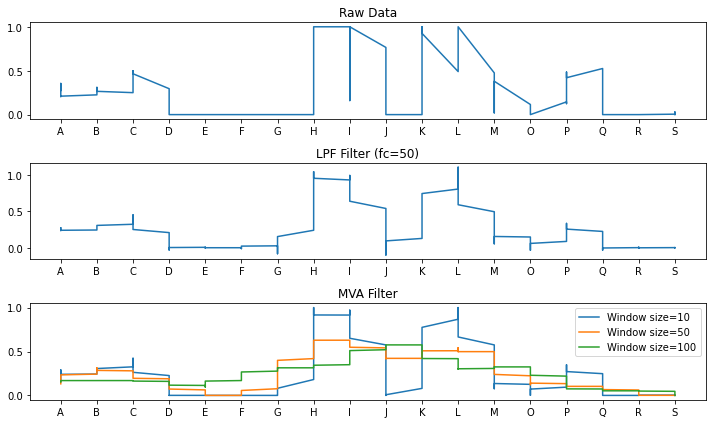

In [17]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(t, x)
plt.title('Raw Data')
plt.subplot(3, 1, 2)
plt.plot(t, y_lpf)
plt.title(f'LPF Filter (fc={fc})')
plt.subplot(3, 1, 3)
for i, size in enumerate(window_sizes):
    plt.plot(t, y_mva[i, :], label=f'Window size={size}')
plt.title('MVA Filter')
plt.legend()
plt.tight_layout()
plt.show()

Pada program ini, kita menggunakan library Pandas untuk memuat data dari file ARFF. Kita juga menggunakan library Scipy untuk menerapkan pemfilteran sinyal/data menggunakan LPF dan MVA filter.

Untuk LPF filter, kita menggunakan frekuensi cut-off sebesar 50 Hz. Frekuensi cut-off ini dipilih berdasarkan karakteristik data yang sedang diproses. Misalnya, jika data adalah data EEG, kita dapat memilih frekuensi cut-off sebesar 50 Hz karena sinyal EEG memiliki frekuensi maksimum sekitar 30-40 Hz.

Untuk MVA filter, kita menggunakan 3 ukuran jendela yang berbeda, yaitu 10, 50, dan 100. Pemilihan ukuran jendela ini bergantung pada karakteristik data yang sedang diproses. Jika data memiliki fluktuasi yang cepat, kita dapat memilih ukuran jendela yang lebih kecil. Namun, jika data memiliki fluktuasi yang lebih lambat, kita dapat memilih ukuran jendela yang lebih besar.

Setelah pemfilteran sinyal/data, kita memplot data asli dan hasil pemfilteran menggunakan library Matplotlib. Pada plot hasil MVA filter, kita dapat melihat bahwa ukuran jendela yang lebih besar memberikan plot data yang lebih mulus. Hal ini disebabkan karena ukuran jendela yang lebih besar dapat menghilangkan fluktuasi kecil pada data. Namun, ukuran jendela yang lebih besar juga dapat mempengaruhi respon waktu filter.